## The objective of this notebook is to classify credit card fraud to predict future occurence through the application of a machine learning model

#### The dataset the model will be trained on, is availavble publicly on Kaggle at: 
https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

#### Feature Explanation:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# importing the data with pandas
data = pd.read_csv("card_transdata.csv")
# checking the DataFrame
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# Checking the last 10 rows
data.tail(10)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999990,20.334489,11.437333,0.699527,1.0,1.0,0.0,1.0,0.0
999991,26.807213,0.102574,2.746114,1.0,0.0,0.0,1.0,0.0
999992,9.844674,0.250108,0.814046,1.0,0.0,0.0,1.0,0.0
999993,4.846253,2.844450,0.867740,1.0,0.0,0.0,1.0,0.0
999994,3.295884,0.085712,0.831991,1.0,0.0,0.0,1.0,0.0
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [5]:
# checking length of Data
len(data)

1000000

### Exploratory Data Analysis

In [6]:
# Checking data types
data.dtypes

distance_from_home                float64
distance_from_last_transaction    float64
ratio_to_median_purchase_price    float64
repeat_retailer                   float64
used_chip                         float64
used_pin_number                   float64
online_order                      float64
fraud                             float64
dtype: object

In [7]:
# Checking for missing, NaN or Null values
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
# checking values avalilable in target column (fraud)
data["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [11]:
# Checking general statistical attributes of the DataFrame
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


#### Visualising the data using matplotlib

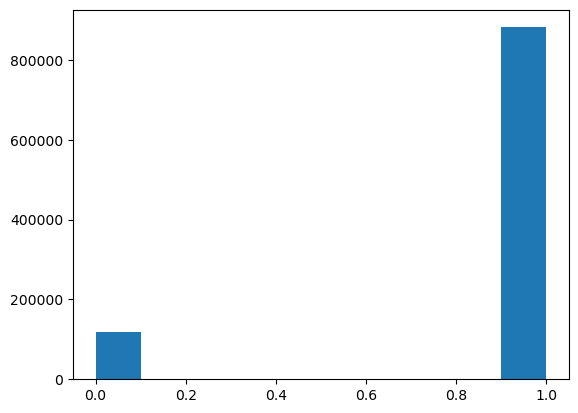

In [12]:
# Visualizing distribution of "repeat_retailer"

plt.hist(data["repeat_retailer"])
plt.show;

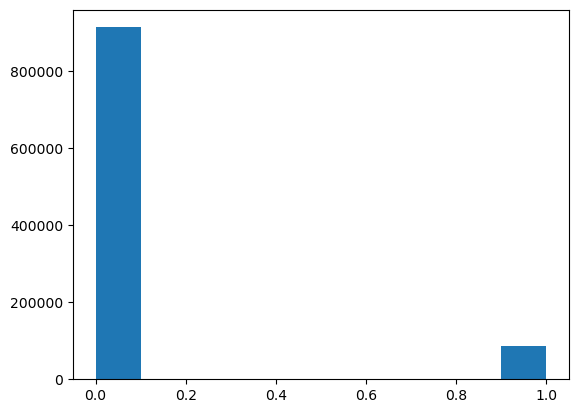

In [25]:
plt.hist(data["fraud"])
plt.show;

## Preprocessing

In [36]:
# Splitting data into features & labels
x = data.drop("fraud", axis=1)
y = data["fraud"]

# checking the data splits
x.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [37]:
# Building a baseline model
np.random.seed(42)

# Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.25)

# Using Stochastic Gradient Descent Classifier (SGD)
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.963644

### Evaluating the model

In [41]:
# Predicting on the model
y_preds = clf.predict(x_test)
y_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
# Classification Report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98    228258
         1.0       0.91      0.65      0.76     21742

    accuracy                           0.96    250000
   macro avg       0.94      0.82      0.87    250000
weighted avg       0.96      0.96      0.96    250000



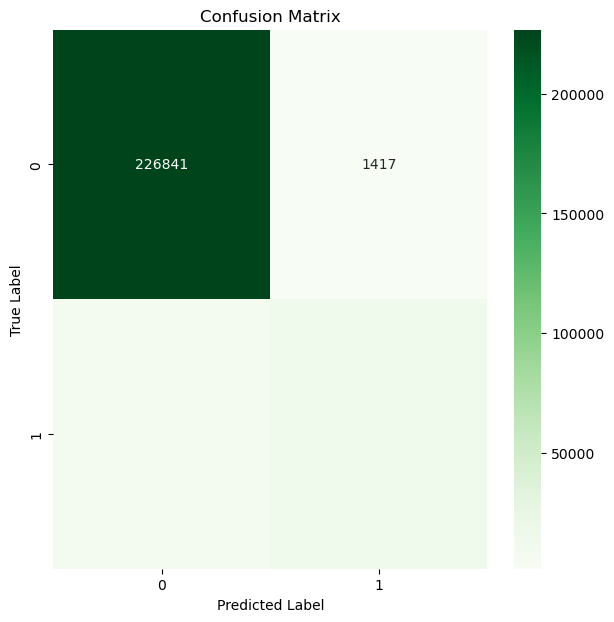

In [47]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

 # Plotting a confusion matrix
import seaborn as sns
plt.figure(figsize=(7, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show();